# Finding the Best Two Markets in Which to Advertise
**by Gerard Tieng**

In this project, we will assume the role of a data analyst employed by an e-learning company whose task it is to identify the next best markets in which to advertise the company's services.


In this project we ill demonstrate the use and importance of:
- how to summarize distributions using the mean, the median, and the mode.
- how to measure the variability of a distribution using the range, the mean absolutie deviation, the variacne, and the standard deviation.
- how to locate any value in a distribution using z-scores.

## Introduction to the Dataset

The dataset for this project is sourced from FreeCodeCamp's 2017 New Coder Survey. This data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Using readily available datasets saves us time in organizing our own. However, much still needs to be done to clean and understand the data.

We will first begin by importing the pandas library for managing dataframes.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

Using `DataFrame.shape` we can see that this particular survey has over 18,000 records with answers across 136 columns.

In [2]:
survey.shape

(18175, 136)

A quick inspection with `Dataframe.head()` already shows there are many null values and far too many non-essential columns here for completing this task. Before we begin, we will need to pare down this dataset down to the information we need.

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before beginning analyzation, it's important to formulate a strategy plan by which an answer can be formed. To identify the next booming markets for this e-learning business, we'll investigate the following:

- Confirming the dataset is representative of our target customer
- Identifying the greatest populations of new coders
- Identifying how much new coders are willing to spend on learning.

## Is Our Data a Match?

One of the more pertinent columns identified in this set is `JobRoleInterest`, which, as the name suggests, contains the career goal and primary interest of the new coders in this survey. We will use the following code to drop any records with a missing values and preview the value counts from this series by most popular count.

In [4]:
#drop NaN records in the columns
survey.dropna(subset=["JobRoleInterest"], inplace=True)

import re
job_results = survey["JobRoleInterest"].str.split(",") #splits single string to list

master_jobs={} #frequency table

for jobs in job_results:
    for job in jobs:
        job = re.sub(r"^\s+", "", job) #replaces whitespaces at head of string
        if job not in master_jobs:
            master_jobs[job] = 1
        else:
            master_jobs[job] += 1

#print frequency table by sort by second dictionary item            
for key, value in sorted(master_jobs.items(), key=lambda item: item[1], reverse=True):
    print(key, value)

Full-Stack Web Developer 4198
Front-End Web Developer 3533
Back-End Web Developer 2772
Mobile Developer 2304
Data Scientist 1643
Game Developer 1628
User Experience Designer 1469
Information Security 1326
Data Engineer 1248
DevOps / SysAdmin 927
Product Manager 814
Quality Assurance Engineer 498
Software Engineer 11
Software Developer 6
Desktop Application Developer 3
Artificial Intelligence 3
Software engineer 3
Not sure 2
Programmer 2
Not sure yet 2
Project Manager 2
Unsure 2
data analyst 2
programmer 2
Ethical Hacker 2
Business Analyst 2
undecided 2
Data Analyst 2
Product Designer 2
Researcher 2
Machine Learning Engineer 2
User Interface Designer 2
Java developer 2
Web Designer 2
Bioinformatics/science  1
software developer 1
Non technical  1
Artificial intelligence 1
Project Management 1
Bioinformatics  1
All - whatever is required to develop tools to revolutionize the mechanical engineering process 1
AI and Machine Learning 1
System Engineer 1
College professor 1
System Administra

There are a handful of popular answers from the analysis above, but with a deeper dive we observe that more than 80% of all survey takers are interested in learning about Web and Mobile development, which is a definite match for the services we are marketing.

In [5]:
survey["JobRoleInterest"].str.contains("Web Developer").value_counts(normalize=True)

True     0.826087
False    0.173913
Name: JobRoleInterest, dtype: float64

Meanwhile, 30% of survey takers are focused on their one subject to master, the other 70% see themselves applying their learnings to two or more disciplines.

In [6]:
job_results.apply(lambda x: len(x)).value_counts(normalize=True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

## Where do these new coders live?

Now that we have established that this dataset has a useful sample of people to which we can market Web development and Mobile education, let's investigate which markets in which we should invest. The following code will setup a frequency table by which we can determine the biggest potential market for our business.

In [7]:
#drop Nan values
survey.dropna(subset=["CountryLive"], inplace=True)

#frequency table
country_freq = {}
for country in survey["CountryLive"]:
    if country not in country_freq:
        country_freq[country] = 1
    else:
        country_freq[country] += 1

#convert frequency table to sorted dataframe with count and percentage
country_table = pd.DataFrame.from_dict(country_freq, orient="index").sort_values(by=0, ascending = False).rename(columns={0:"Count"})
country_table["Percentage"] = country_table["Count"].apply(lambda x: x / country_table["Count"].sum())
country_table

,Count,Percentage
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


The United States makes up roughly half of the market in this survey. India would be next best suited as a secondary market by size, but the market potential would be 6-7 times smaller. For the purposes of this project, we can include Canada and the United Kingdom as target markets whose primary language is English.

## How much are new coders spending on learning?

As we inspect the table further, there are two more relevant columns that will help us understand how much new coders are spending on learning: `"MoneyForLearning" & "MonthsProgramming"`. With these two columns, we are able to compute `"MoneyPerMonth"` to see if these new coders would likely pay for our $59 monthly subscription.

In [8]:
import numpy as np
survey["MoneyForLearning"].replace(0, 1, inplace=True)
survey["MoneyPerMonth"] = survey["MoneyForLearning"]/survey["MonthsProgramming"]
survey["MoneyPerMonth"].replace(np.inf, np.NaN, inplace=True)
survey.dropna(subset=["MoneyPerMonth"], inplace=True)

In [9]:
#subset data containing customers from the USA, India, UK, and Canada.
big_4 = survey[survey["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"]) ]
big_4.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                      107.592608
India                       136.492329
United Kingdom               47.069270
United States of America    232.920050
Name: MoneyPerMonth, dtype: float64

By calculating the mean of `"MoneyPerMonth"` from each country, we get an idea of what the average customer pays for learning a month. Let's visualize this in a boxplot to understand better the distribution of monthly spending.

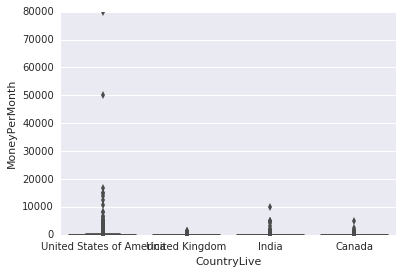

In [10]:
import seaborn as sns
%matplotlib inline
sns.boxplot(y="MoneyPerMonth", x="CountryLive", data=big_4)

After plotting the data, it's very apparent that there are major outliers present and affecting the mean. With the following code, we'll subset the data with a cap at $20000.

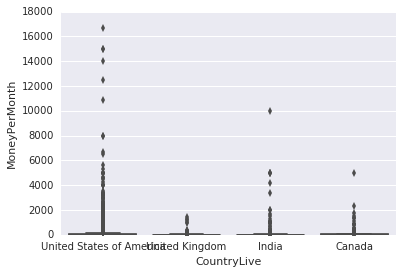

In [11]:
under_20k = big_4[big_4["MoneyPerMonth"] < 20000]
sns.boxplot(y="MoneyPerMonth", x="CountryLive", data=under_20k)

In [12]:
under_20k.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                      107.592608
India                       136.492329
United Kingdom               47.069270
United States of America    186.789651
Name: MoneyPerMonth, dtype: float64

With the major outliers removed, we see a more useful distribution and adjusted mean values. We'll confirm the data once again by investigating the minor outliers from this new data subset, beginning with India.

In [13]:
india_outliers = under_20k[(under_20k["MoneyPerMonth"] > 2500) & (under_20k["CountryLive"] == "India")]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Upon inspection of the outliers from India, we find that all of the bigger spenders are not enrolled in expensive bootcamps. This does not make sense to us, and these rows will be removed.

Now onto investigating the USA outliers.

In [14]:
usa_outliers = under_20k[(under_20k["MoneyPerMonth"] > 10000) & (under_20k["CountryLive"] == "United States of America")]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


The same conditions from the India outliers are present here in the USA set with the exception of one survey taker. The removal of the one record should not greatly affect the overall project, so we'll have all these records rev

In [15]:
under_20k.drop(india_outliers.index, inplace=True)


canada_outliers = under_20k[(under_20k["MoneyPerMonth"] > 4000) & (under_20k["CountryLive"] == "Canada")]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


he's cool. we'llve leave it in

In [16]:
outliers = india_outliers + usa_outliers
final_markets = big_4[big_4["MoneyPerMonth"] < 20000].drop(outliers.index)

## Conclusion

In [17]:
final_markets.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                      107.592608
India                        65.775708
United Kingdom               47.069270
United States of America    157.211042
Name: MoneyPerMonth, dtype: float64

Based on the average price which new coders are spending each month, the USA makes the most sense as the leading country to market the business. The average \$157 it would likely spend monthly is double that of the $59 per month subscription fee.

The UK is not recommended for marketing as its average falls below the subscription fee.

Canada appears to be a front-runner for second place, though India should not be counted out entirely due to its massive size.